# Singlar Value Decomposition

In [6]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [7]:
# load titanic dataset
titanic_df = sns.load_dataset('titanic')
titanic_df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [8]:
# Define the feature columns and target variable
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']
target = 'survived'

# Handle missing values
numeric_features = ['age','fare']
numeric_transformer = SimpleImputer(strategy='median')
titanic_df[numeric_features] = numeric_transformer.fit_transform(titanic_df[numeric_features])

categorical_features = ['pclass', 'sex']
categorical_transformer = SimpleImputer(strategy='constant', fill_value='missing')
titanic_df[categorical_features] = categorical_transformer.fit_transform(titanic_df[categorical_features])

# Encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore')
X = encoder.fit_transform(titanic_df[categorical_features]).toarray()

# Scale numeric features
scaler = StandardScaler()
X_numeric = scaler.fit_transform(titanic_df[numeric_features])

# Combine numeric and encoded categorical features
X = np.hstack((X, X_numeric))

# Prepare the target variable
y = titanic_df[target].values

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X.shape

(891, 7)

In [10]:
# perform SVD
svd = TruncatedSVD(n_components=4)
Y = svd.fit_transform(X)

print('Singular Values:', svd.singular_values_)
print('Explained Variance Ratio: ', svd.explained_variance_ratio_)

Singular Values: [34.0919237  29.83381513 28.43241553 18.6007055 ]
Explained Variance Ratio:  [0.37544109 0.16349524 0.21253133 0.12019999]


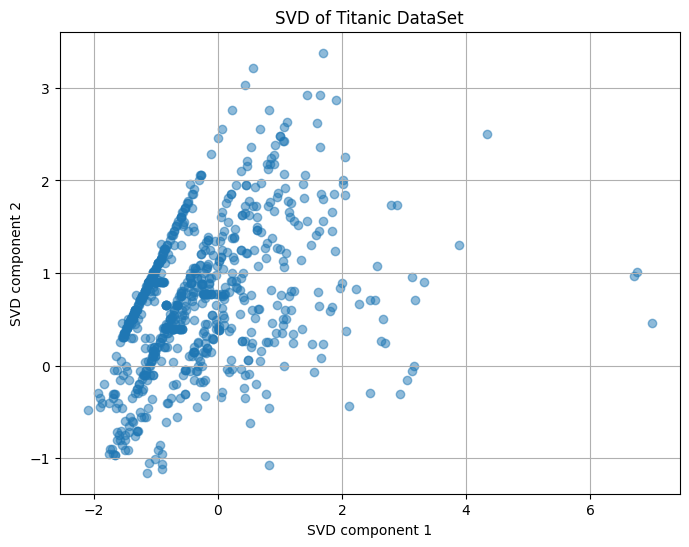

In [11]:
import matplotlib.pyplot as plt

# assuming Y is the result from SVD with 2 components
plt.figure(figsize=(8,6))
plt.scatter(Y[:,0], Y[:, 1], alpha=0.5)
plt.xlabel('SVD component 1')
plt.ylabel('SVD component 2')
plt.title('SVD of Titanic DataSet')
plt.grid(True)
plt.show()

C:\Users\sufwa\AppData\Local\Temp\ipykernel_19980\1132575687.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Survived')


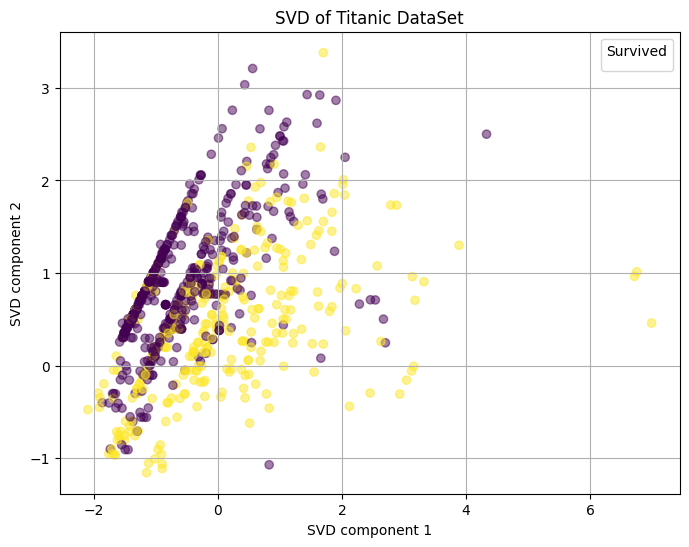

In [12]:
# assuming 'survived' is the last column in selected features
categories = titanic_df['survived'].values  # survival status

plt.figure(figsize=(8,6))
plt.scatter(Y[:,0], Y[:, 1], alpha=0.5, c= categories, cmap='viridis')
plt.xlabel('SVD component 1')
plt.ylabel('SVD component 2')
plt.title('SVD of Titanic DataSet')
plt.legend(title='Survived')
plt.grid(True)
plt.show()

---
# SVD in Python

In [13]:
# generate a random matrix  of 4x3 dataset
X = np.random.rand(4,3)
X

array([[0.21608493, 0.82102375, 0.56321629],
       [0.0876144 , 0.85988783, 0.25605422],
       [0.77433814, 0.53913321, 0.96464887],
       [0.69312631, 0.19450132, 0.23126205]])

In [16]:
#let's apply SVD
U, S, VT = np.linalg.svd(X)
# print each matrix separately
print('U: \n', U)
print('S: \n', S)
print('VT: \n', VT)

U: 
 [[-0.51487353 -0.40711241 -0.15637048 -0.73804676]
 [-0.39670847 -0.62962974  0.39170701  0.54106783]
 [-0.69051094  0.43688913 -0.46594317  0.33943998]
 [-0.31736774  0.49694444  0.77782444 -0.21751573]]
S: 
 [1.87759752 0.77961788 0.3316693 ]
VT: 
 [[-0.47969741 -0.63797166 -0.60239734]
 [ 0.69214638 -0.6970878   0.1870882 ]
 [ 0.5392808   0.32720141 -0.77596099]]


In [17]:
U.shape

(4, 4)

In [18]:
S.shape

(3,)

In [19]:
VT.shape

(3, 3)